In [352]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
#loading data 

df = pd.read_csv(r"E:\DS SM\PortfolioProjects\Birth Weight Analysis\data\babies.csv")
df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


## Exploratory Data Analysis

In [354]:
df.shape

(1236, 8)

In [355]:
df.describe()

,case,bwt,gestation,parity,age,height,weight,smoke
count,1236.000000,1236.000000,1223.000000,1236.000000,1234.000000,1214.000000,1200.000000,1226.000000
mean,618.500000,119.576861,279.338512,0.254854,27.255267,64.047776,128.625833,0.394780
std,356.946775,18.236452,16.027693,0.435956,5.781405,2.533409,20.971862,0.489003
min,1.000000,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,309.750000,108.750000,272.000000,0.000000,23.000000,62.000000,114.750000,0.000000
50%,618.500000,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,927.250000,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,1236.000000,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [356]:
df.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


#### Here data type of variable smoke is float and we have to convert it into int and also there are null values in dataset. To convert smoke data type to int first fill the variable using mean and mode

In [358]:
df = df.dropna(subset=['smoke'])

In [360]:
df.gestation = df.gestation.fillna(df.gestation.mean())
df.iloc[:,4:7] = df.iloc[:,4:7].fillna(df.iloc[:,4:7].mean())
#df['smoke'].fillna(df['smoke'].median())

In [361]:
df.isnull().sum()

case         0
bwt          0
gestation    0
parity       0
age          0
height       0
weight       0
smoke        0
dtype: int64

In [362]:
df['smoke'] = df['smoke'].astype(int)

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1226 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1226 non-null   int64  
 1   bwt        1226 non-null   int64  
 2   gestation  1226 non-null   float64
 3   parity     1226 non-null   int64  
 4   age        1226 non-null   float64
 5   height     1226 non-null   float64
 6   weight     1226 non-null   float64
 7   smoke      1226 non-null   int32  
dtypes: float64(4), int32(1), int64(3)
memory usage: 81.4 KB


In [364]:
df.corr()

,case,bwt,gestation,parity,age,height,weight,smoke
case,1.000000,-0.059471,0.011925,0.200148,0.008010,-0.039767,-0.054978,-0.002348
bwt,-0.059471,1.000000,0.403187,-0.044566,0.029631,0.199866,0.153112,-0.240093
gestation,0.011925,0.403187,1.000000,0.071303,-0.058370,0.064344,0.022986,-0.066917
parity,0.200148,-0.044566,0.071303,1.000000,-0.344427,0.035523,-0.087192,-0.012815
age,0.008010,0.029631,-0.058370,-0.344427,1.000000,0.001774,0.156803,-0.070147
height,-0.039767,0.199866,0.064344,0.035523,0.001774,1.000000,0.430770,0.014288
weight,-0.054978,0.153112,0.022986,-0.087192,0.156803,0.430770,1.000000,-0.064548
smoke,-0.002348,-0.240093,-0.066917,-0.012815,-0.070147,0.014288,-0.064548,1.000000


### Correlation Heatmap

#### From the correlation map it is showing there is correlation between birth weight of the child and gestation, height and weight of the mother 

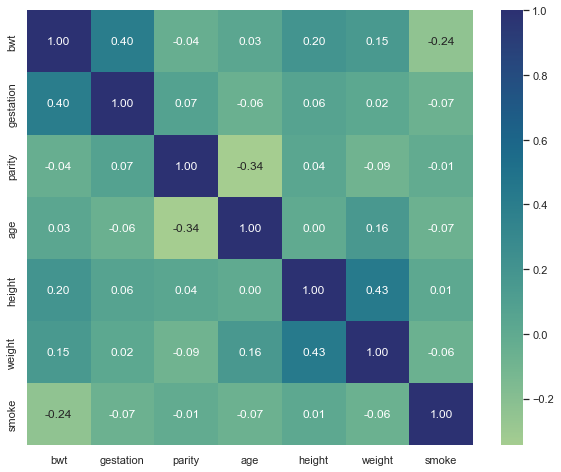

In [365]:
plt.figure(figsize = (10,8))
sns.heatmap(df.iloc[:,1:].corr(), annot = True, cmap = 'crest', fmt ='.2f')
plt.show()

#### Count of smokers vs 

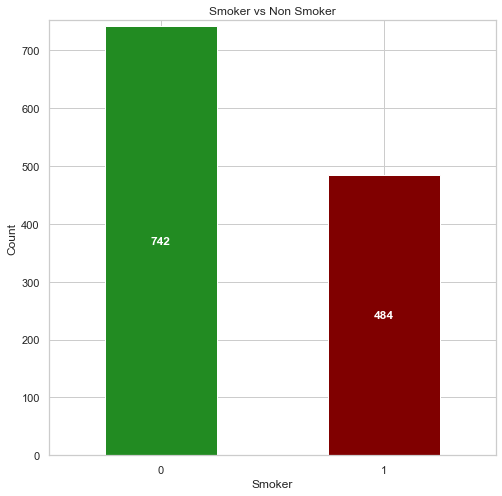

In [366]:
# Create figure FIRST
plt.figure(figsize=(8, 8))

# Plot the bar chart
total_smoke = df['smoke'].value_counts()
total_smoke.plot(kind='bar', color=['forestgreen', 'maroon'])

# Add data labels
for i, x in enumerate(total_smoke):
    plt.text(i, x / 2, str(x), ha='center', va='center', color='white', fontweight='bold')

# Set axis limits
plt.ylim(0, max(total_smoke) + 10)

# Add labels and title
plt.xticks(rotation=0)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker vs Non Smoker')

# Show plot
plt.show()

#### count if mothers first pregnancy or not

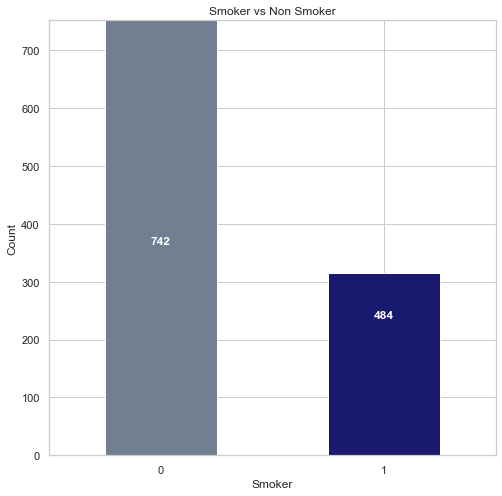

In [367]:
# Create figure FIRST
plt.figure(figsize=(8, 8))

# Plot the bar chart
total_parity = df['parity'].value_counts()
total_parity.plot(kind='bar', color=['slategray', 'midnightblue'])

# Add data labels
for i, x in enumerate(total_smoke):
    plt.text(i, x / 2, str(x), ha='center', va='center', color='white', fontweight='bold')

# Set axis limits
plt.ylim(0, max(total_smoke) + 10)

# Add labels and title
plt.xticks(rotation=0)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker vs Non Smoker')

# Show plot
plt.show()

#### Histograms / KDE plots

<Axes: xlabel='bwt', ylabel='Count'>

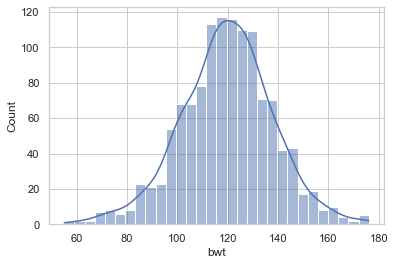

In [368]:
sns.histplot(df['bwt'], kde=True)

#### FacetGrid for small multiples

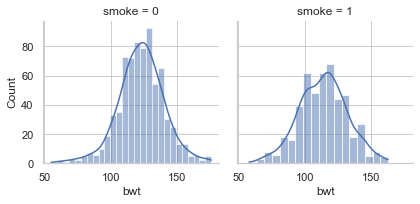

In [369]:
g = sns.FacetGrid(df, col="smoke")
g.map(sns.histplot, "bwt", kde=True)

#### Bar plot of smoke vs bwt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1716\1093510675.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoke', y='bwt', data=df, palette =['darkorange', 'burlywood'])


([<matplotlib.axis.XTick at 0x15cc0c696a0>,
 [Text(0, 0, 'Non-Smoker'), Text(1, 0, 'Smoker')])

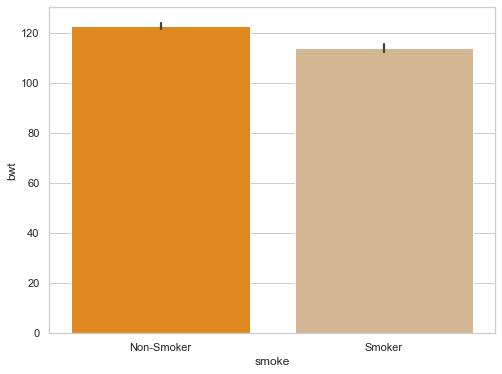

In [370]:
plt.figure(figsize=(8,6))
sns.barplot(x='smoke', y='bwt', data=df, palette =['darkorange', 'burlywood'])
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])

#### Mothers who smoke vs parity

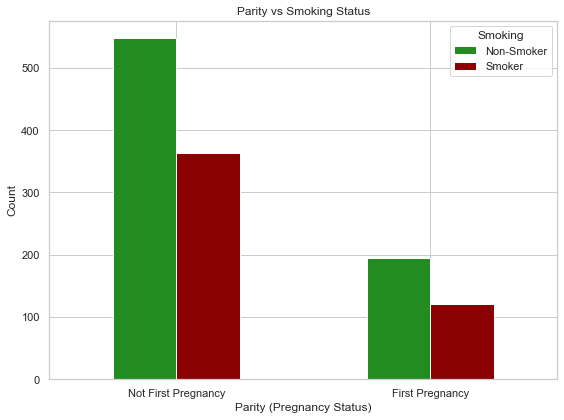

In [371]:
# Set style
sns.set(style='whitegrid')

# Create a crosstab of smoke and parity
cross_tab = pd.crosstab(df['parity'], df['smoke'])

# Rename columns for readability (optional)
cross_tab.columns = ['Non-Smoker', 'Smoker']
cross_tab.index = ['Not First Pregnancy', 'First Pregnancy']

# Plot the grouped bar chart
cross_tab.plot(kind='bar', color=['forestgreen', 'darkred'], figsize=(8,6))

# Add labels and title
plt.title('Parity vs Smoking Status')
plt.xlabel('Parity (Pregnancy Status)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Smoking')
plt.tight_layout()
plt.show()

#### Scatter plot of gestation vs bwt

<Axes: xlabel='gestation', ylabel='bwt'>

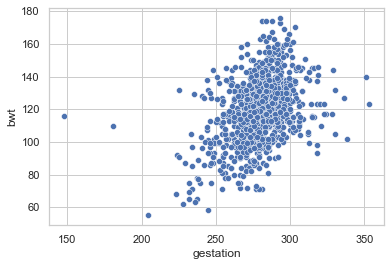

In [372]:
sns.scatterplot(x='gestation', y='bwt', data=df)

### Feature Engineering

Older, heavier mothers may carry different risk than younger, lighter ones.

Comparing first-time smokers vs experienced moms who smoke

In [373]:
df['age_weight'] = df['weight'] * df['age']
df['smoke_parity'] = df['smoke'] * df['parity']

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1226 entries, 0 to 1235
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case          1226 non-null   int64  
 1   bwt           1226 non-null   int64  
 2   gestation     1226 non-null   float64
 3   parity        1226 non-null   int64  
 4   age           1226 non-null   float64
 5   height        1226 non-null   float64
 6   weight        1226 non-null   float64
 7   smoke         1226 non-null   int32  
 8   age_weight    1226 non-null   float64
 9   smoke_parity  1226 non-null   int64  
dtypes: float64(5), int32(1), int64(4)
memory usage: 100.6 KB


### Define feature

In [375]:
x = df.iloc[:,2:8]
y = df.iloc[:,1]

### Train Test Split

In [376]:
from sklearn.model_selection import train_test_split
trainx,testx,trainy,testy = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [377]:
trainx

,gestation,parity,age,height,weight,smoke
718,299.0,0,24.0,62.0,115.0,0
900,281.0,1,27.0,64.0,112.0,0
599,263.0,1,25.0,63.0,107.0,0
99,254.0,0,29.0,64.0,137.0,0
1018,250.0,0,40.0,59.0,140.0,0
...,...,...,...,...,...,...
724,275.0,0,33.0,62.0,118.0,0
914,277.0,1,19.0,62.0,160.0,0
1106,285.0,0,37.0,66.0,135.0,1
237,276.0,0,23.0,63.0,120.0,0


In [378]:
trainy

718     137
900     111
599      97
99      105
1018    103
       ... 
724     139
914     110
1106     96
237     126
1071    103
Name: bwt, Length: 980, dtype: int64

### Machine Learning 
#### Linear Regression

In [379]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error, r2_score

lin = LR()
lin.fit(trainx, trainy)
lin_predictions = lin.predict(testx) 
lin_mse = mean_squared_error(testy, lin_predictions)
lin_r2 = r2_score(testy, lin_predictions)
print(f"Mean Squared Error: {lin_mse:.2f}")
print(f"R-squared: {lin_r2:.2f}")

Mean Squared Error: 227.01
R-squared: 0.27


#### Feature Importance Description
The table below shows the coefficients of each feature from a linear regression model. These coefficients indicate the expected change in the target variable (e.g., birth weight) for a one-unit increase in the respective feature, assuming all other features are held constant.


Feature	Coefficient	Interpretation
Height	+1.23	A one-unit increase in maternal height is associated with an increase of 1.23 units in the predicted target value.
Gestation	+0.42	Longer gestation periods slightly increase the predicted value by 0.42 units per additional unit.
Weight	+0.06	Maternal weight has a small positive impact, increasing the target by 0.06 units per unit of weight.
Age	+0.02	Maternal age shows a minor positive relationship with the target variable.
Parity	-3.07	Having more previous pregnancies (higher parity) is associated with a decrease of about 3.07 units in the predicted value.
Smoke	-7.57	Smoking during pregnancy has the strongest negative effect, decreasing the predicted value by 7.57 units.
Summary
Height and gestation are the most positively influential features.

Smoking and parity show negative impacts, with smoking having the largest negative coefficient, suggesting it's the most harmful factor in this model.

In [380]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin.coef_
})

print(coef_df.sort_values(by='Coefficient', ascending=False))

     Feature  Coefficient
3     height     1.225212
0  gestation     0.419133
4     weight     0.063134
2        age     0.022312
1     parity    -3.065564
5      smoke    -7.572218


In [381]:
for actual,predicted in zip(testy[:10],lin_predictions[:10]):
    print(f'Actual: {actual :.2f}   | Predicted: {predicted :.1f}')

Actual: 112.00   | Predicted: 122.4
Actual: 129.00   | Predicted: 133.2
Actual: 131.00   | Predicted: 125.3
Actual: 128.00   | Predicted: 115.9
Actual: 110.00   | Predicted: 122.7
Actual: 126.00   | Predicted: 123.0
Actual: 104.00   | Predicted: 117.6
Actual: 152.00   | Predicted: 128.6
Actual: 123.00   | Predicted: 133.9
Actual: 148.00   | Predicted: 135.7


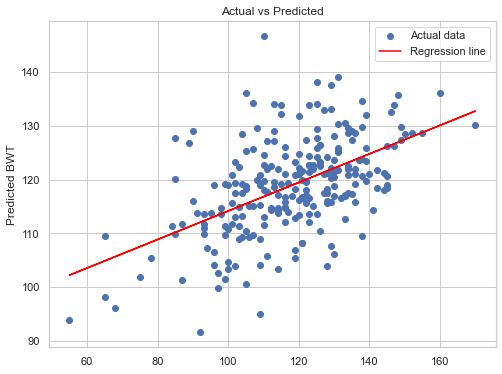

In [382]:
from scipy import stats
x = testy
y = lin_predictions

slope, intercept , r, p, std_err = stats.linregress(x,y)

def myfun(x):
    return slope * x + intercept

my_model  = list(map(myfun,x))

plt.figure(figsize=(8,6))
plt.scatter(x,y, label='Actual data')
plt.plot(x, myfun(x), color='red', label='Regression line')
plt.ylabel("Predicted BWT")
plt.title("Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

#### Interpretation:
Interpretation
Mean Squared Error (MSE): 227.01
The MSE measures how far off your model's predictions are from the actual values, on average, in squared units. A lower MSE means better predictive accuracy.

In this case, an MSE of 227.01 suggests that there is a significant gap between predicted and actual values, indicating the model's predictions are not very precise.

R-squared (R²): 0.27
R² indicates how much of the variation in the target variable is explained by the model. It ranges from 0 (no explanatory power) to 1 (perfect explanation).

An R² of 0.27 means your model is only capturing 27% of the variance in the target variable. This is relatively low and suggests that the model is missing important patterns in the data.

### Random Forest 

In [385]:
from sklearn.ensemble import RandomForestRegressor as RFR

#rf_model = RFR(n_jobs = 1, n_estimators=100, random_state=42)
rf_model = RFR(random_state = 42)
rf_model.fit(trainx,trainy)
rf_predicton = rf_model.predict(testx)
rf_mse = mean_squared_error(testy, rf_predicton)
rf_r2 = r2_score(testy, rf_predicton)
print(f"Mean Squared Error is : {rf_mse:.2f}" )
print(f"R-Suared is: {rf_r2:.2f}" )

Mean Squared Error is : 247.20
R-Suared is: 0.21


#### Model Evaluation – Random Forest Regressor
Mean Squared Error (MSE): 247.20
MSE measures the average squared difference between the predicted and actual values. A lower MSE means your predictions are closer to the actual outcomes.

An MSE of 247.20 indicates a relatively high prediction error. On average, your model's predictions deviate quite a bit from the true values.

R-squared (R²): 0.21
R² indicates how much of the variability in the target variable is explained by the model. It ranges from 0 (no explanatory power) to 1 (perfect prediction).

An R² of 0.21 means that the model explains only 21% of the variance in the target variable, which is relatively low.

This suggests that the model isn't capturing the underlying patterns in the data very well.

Conclusion
While Random Forest is a powerful algorithm, this specific model shows limited performance on your dataset. The relatively high MSE and low R² suggest:

The model's predictions aren't very accurate.

A large portion of the variability in the target remains unexplained.

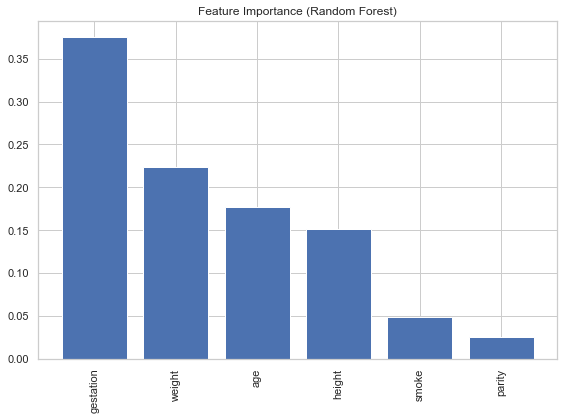

In [386]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

### GradientBoostingRegressor

In [389]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr = GBR(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr.fit(trainx, trainy)

gbr_pred = gbr.predict(testx)

gbr_mse = mean_squared_error(testy, gbr_pred)
gbr_r2 = r2_score(testy, gbr_pred)

print(f"Mean Squared Error: {gbr_mse:.2f}")
print(f"R-squared: {gbr_r2:.2f}")

Mean Squared Error: 230.70
R-squared: 0.26


### Model Evaluation – Gradient Boosting Regressor
#### Mean Squared Error (MSE): 230.70
The MSE shows the average squared difference between predicted and actual values.

An MSE of 230.70 suggests a slight improvement compared to the previous model (MSE was 247.20 with Random Forest).

Lower MSE = better prediction accuracy.

#### R-squared (R²): 0.26
R² explains how much of the variance in the target variable is captured by the model.

An R² of 0.26 means the model explains 26% of the variance — a small improvement over the previous R² of 0.21 from Random Forest.

#### Conclusion
Gradient Boosting Regressor performed marginally better than the Random Forest:

MSE dropped from 247.20 to 230.70

R² increased from 0.21 to 0.26

### Actual vs Predicted Scatter Plot

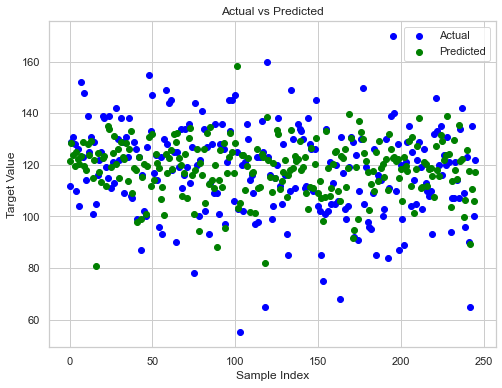

In [393]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(testy)), testy, label='Actual', color='blue')
plt.scatter(range(len(gbr_pred)), gbr_pred, label='Predicted', color='green')
plt.title("Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()